In [41]:
# 데이터 분석 및 시각화에 필요한 라이브러리들을 가져옵니다.
# pathlib: 파일 경로를 쉽게 다루기 위한 라이브러리
from pathlib import Path
# display: Jupyter Notebook에서 데이터프레임 등을 예쁘게 출력하기 위해 사용
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mstick
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import seaborn as sns

######## 한글 폰트 사용을 위한 설정 ########

font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정
########################################## 

# seaborn의 기본 테마를 설정합니다. 'whitegrid' 스타일과 'crest' 색상 팔레트를 사용합니다.
sns.set_theme(style="whitegrid", palette="crest")

# 시각화에서 한글이 깨지지 않도록 나눔고딕 폰트를 설정합니다.
# 시스템에 폰트가 설치되어 있지 않으면 오류가 발생할 수 있어 try-except 구문으로 감쌌습니다.
try:
    plt.rc('font', family='NanumGothic')
except Exception:
    pass
# 마이너스 부호가 깨지는 것을 방지하는 설정입니다.
plt.rc('axes', unicode_minus=False)


---
## Encoded Features vs Target
- 인코딩된 데이터로 시각화 다시 해보기
- COD 라벨 기준

In [42]:
 
DATA_PATH3 = Path('../data/encoded_dataset.csv')
 
encoded_df = pd.read_csv(DATA_PATH3) 

In [43]:
# 인코딩된 데이터셋 기본 정보 확인
print("=== 데이터셋 기본 정보 ===")
print(f"데이터 크기: {encoded_df.shape}")
print(f"컬럼 수: {len(encoded_df.columns)}")
print(f"행 수: {len(encoded_df)}")
print("\n=== 컬럼 정보 ===")
print(encoded_df.info())
display(encoded_df.head())

=== 데이터셋 기본 정보 ===
데이터 크기: (525709, 25)
컬럼 수: 25
행 수: 525709

=== 컬럼 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525709 entries, 0 to 525708
Data columns (total 25 columns):
 #   Column                                                       Non-Null Count   Dtype
---  ------                                                       --------------   -----
 0   Patient ID                                                   525709 non-null  int64
 1   Age recode with <1 year olds and 90+                         525709 non-null  int64
 2   Sex                                                          525709 non-null  int64
 3   Year of diagnosis                                            525709 non-null  int64
 4   Year of follow-up recode                                     525709 non-null  int64
 5   Race recode (W, B, AI, API)                                  525709 non-null  int64
 6   Site recode ICD-O-3/WHO 2008                                 525709 non-null  int64
 7   Primary

,Patient ID,Age recode with <1 year olds and 90+,Sex,Year of diagnosis,Year of follow-up recode,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Primary Site,Primary Site - labeled,Derived Summary Grade 2018 (2018+),...,RX Summ--Surg Oth Reg/Dis (2003+),Sequence number,Median household income inflation adj to 2023,Number of Cores Positive Recode (2010+),Number of Cores Examined Recode (2010+),EOD Primary Tumor Recode (2018+),PRCDA 2020,Survival months,target_label,Survival months_bin_3m
0,671,14,1,18,0,4,10,341,22,2,...,6,7,2,0,0,10,0,59,-1,19
1,812,14,0,22,0,4,18,163,3,12,...,6,17,2,0,0,3,0,7,-1,2
2,878,13,1,4,0,4,0,181,10,8,...,6,7,0,0,0,22,0,218,-1,72
3,1018,15,0,11,0,4,1,182,11,8,...,6,10,1,0,0,22,0,134,-1,44
4,1269,9,0,7,0,4,16,187,16,8,...,6,17,1,0,0,22,0,187,-1,62


---
## COD (Cause of Death) 그룹 분류
- COD list.ipynb에서 정의된 5개 그룹을 기반으로 사망 원인을 분류
- **Cancer**: 암 직접 사망
- **Complications**: 병원 집중 관리로 예방·완화 가능한 합병증  
- **Other Non-cancer**: 병원 개입 여지가 적은 질병
- **External/Unclear**: 외인사·불명
- **Suicide**: 자살·자가손상

In [44]:
# COD 분류 함수 정의
def classify_cod_group(cod_name):
    """
    COD(Cause of Death)를 5개 그룹으로 분류하는 함수
    
    Args:
        cod_name (str): 사망 원인명
        
    Returns:
        str: 분류된 그룹명 (Cancer, Complications, Other Non-cancer, External/Unclear, Suicide)
    """
    
    # 1. Cancer (암 직접 사망)
    cancer_list = [
        "Lung and Bronchus", "Colon excluding Rectum", "Rectum and Rectosigmoid Junction",
        "Liver", "Intrahepatic Bile Duct", "Stomach", "Esophagus", "Pancreas", "Breast",
        "Prostate", "Urinary Bladder", "Kidney and Renal Pelvis", "Ovary", "Corpus Uteri",
        "Cervix Uteri", "Uterus, NOS", "Vulva", "Vagina", "Testis", "Penis", "Thyroid",
        "Other Endocrine including Thymus", "Brain and Other Nervous System", "Eye and Orbit",
        "Bones and Joints", "Soft Tissue including Heart", "Peritoneum, Omentum and Mesentery",
        "Retroperitoneum", "Other Urinary Organs", "Gallbladder", "Other Biliary",
        "Small Intestine", "Other Digestive Organs", "Trachea, Mediastinum and Other Respiratory Organs",
        "Nose, Nasal Cavity and Middle Ear", "Tongue", "Floor of Mouth", "Gum and Other Mouth",
        "Lip", "Tonsil", "Oropharynx", "Nasopharynx", "Hypopharynx", "Other Oral Cavity and Pharynx",
        "Non-Hodgkin Lymphoma", "Hodgkin Lymphoma", "Myeloma", "Acute Myeloid Leukemia",
        "Chronic Lymphocytic Leukemia", "Chronic Myeloid Leukemia", "Acute Lymphocytic Leukemia",
        "Other Myeloid/Monocytic Leukemia", "Other Acute Leukemia", "Other Lymphocytic Leukemia",
        "Melanoma of the Skin", "Non-Melanoma Skin", "Miscellaneous Malignant Cancer",
        "In situ, benign or unknown behavior neoplasm"
    ]
    
    # 2. Complications (합병증: 집중 관리로 예방·완화 가능)
    complications_list = [
        "Septicemia", "Pneumonia and Influenza",
        "Other Infectious and Parasitic Diseases including HIV",
        "Chronic Liver Disease and Cirrhosis",
        "Nephritis, Nephrotic Syndrome and Nephrosis",
        "Chronic Obstructive Pulmonary Disease and Allied Cond",
        "Diabetes Mellitus", "Hypertension without Heart Disease",
        "Alzheimers (ICD-9 and 10 only)"
    ]
    
    # 3. Other Non-cancer (기타 질병: 병원 개입 여지 적음)
    other_non_cancer_list = [
        "Diseases of Heart", "Cerebrovascular Diseases", "Aortic Aneurysm and Dissection",
        "Other Diseases of Arteries, Arterioles, Capillaries", "Atherosclerosis",
        "Stomach and Duodenal Ulcers", "Congenital Anomalies",
        "Complications of Pregnancy, Childbirth, Puerperium"
    ]
    
    # 4. External / Unclear (외인사·불명)
    external_unclear_list = [
        "Accidents and Adverse Effects",
        "Homicide and Legal Intervention",
        "State DC not available or state DC available but no COD",
        "Symptoms, Signs and Ill-Defined Conditions",
        "Other Cause of Death"
    ]
    
    # 5. Suicide (자살)
    suicide_list = [
        "Suicide and Self-Inflicted Injury"
    ]
    
    # 분류 로직
    if cod_name in cancer_list:
        return "Cancer"
    elif cod_name in complications_list:
        return "Complications"
    elif cod_name in other_non_cancer_list:
        return "Other Non-cancer"
    elif cod_name in external_unclear_list:
        return "External/Unclear"
    elif cod_name in suicide_list:
        return "Suicide"
    else:
        return "Unknown"  # 정의되지 않은 경우
    
print("COD 그룹 분류 함수가 정의되었습니다.")

COD 그룹 분류 함수가 정의되었습니다.


In [45]:
# 데이터셋에서 COD 관련 컬럼 확인
print("=== COD 관련 컬럼 확인 ===")
cod_columns = [col for col in encoded_df.columns if 'COD' in col or 'Cause' in col.replace('_', ' ')]
print(f"COD 관련 컬럼: {cod_columns}")

# 모든 컬럼명 확인 (COD 패턴 찾기)
print("\n=== 전체 컬럼 중 사망원인 관련 컬럼 탐색 ===")
potential_cod_cols = []
for col in encoded_df.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in ['cod', 'cause', 'death', 'cancer', 'disease']):
        potential_cod_cols.append(col)
        
print(f"잠재적 COD 컬럼들: {potential_cod_cols}")

# 처음 몇 개 컬럼명도 확인
print(f"\n=== 처음 20개 컬럼명 ===")
print(list(encoded_df.columns[:20]))

=== COD 관련 컬럼 확인 ===
COD 관련 컬럼: []

=== 전체 컬럼 중 사망원인 관련 컬럼 탐색 ===
잠재적 COD 컬럼들: ['Age recode with <1 year olds and 90+', 'Year of follow-up recode', 'Race recode (W, B, AI, API)', 'Site recode ICD-O-3/WHO 2008', 'EOD Schema ID Recode (2010+)', 'Combined Summary Stage with Expanded Regional Codes (2004+)', 'Number of Cores Positive Recode (2010+)', 'Number of Cores Examined Recode (2010+)', 'EOD Primary Tumor Recode (2018+)']

=== 처음 20개 컬럼명 ===
['Patient ID', 'Age recode with <1 year olds and 90+', 'Sex', 'Year of diagnosis', 'Year of follow-up recode', 'Race recode (W, B, AI, API)', 'Site recode ICD-O-3/WHO 2008', 'Primary Site', 'Primary Site - labeled', 'Derived Summary Grade 2018 (2018+)', 'Laterality', 'EOD Schema ID Recode (2010+)', 'Combined Summary Stage with Expanded Regional Codes (2004+)', 'RX Summ--Surg Prim Site (1998+)', 'RX Summ--Scope Reg LN Sur (2003+)', 'RX Summ--Surg Oth Reg/Dis (2003+)', 'Sequence number', 'Median household income inflation adj to 2023', 'Number of C

In [46]:
# Primary Site와 Site recode 컬럼의 고유값 확인
print("=== 'Primary Site - labeled' 컬럼의 고유값 ===")
if 'Primary Site - labeled' in encoded_df.columns:
    primary_site_values = encoded_df['Primary Site - labeled'].unique()
    print(f"고유값 개수: {len(primary_site_values)}")
    print("처음 20개 값:")
    for i, value in enumerate(primary_site_values[:20]):
        print(f"  {i+1}: {value}")
else:
    print("'Primary Site - labeled' 컬럼이 없습니다.")

print("\n=== 'Site recode ICD-O-3/WHO 2008' 컬럼의 고유값 ===")
if 'Site recode ICD-O-3/WHO 2008' in encoded_df.columns:
    site_recode_values = encoded_df['Site recode ICD-O-3/WHO 2008'].unique()
    print(f"고유값 개수: {len(site_recode_values)}")
    print("처음 20개 값:")
    for i, value in enumerate(site_recode_values[:20]):
        print(f"  {i+1}: {value}")
else:
    print("'Site recode ICD-O-3/WHO 2008' 컬럼이 없습니다.")

# 컬럼 중에 'Lung', 'Breast', 'Prostate' 등 암 관련 키워드가 있는지 확인
print("\n=== 컬럼명에서 암 관련 키워드 탐색 ===")
cancer_keywords = ['Lung', 'Breast', 'Prostate', 'Colon', 'Liver', 'Stomach', 'Pancreas']
cancer_related_cols = []
for col in encoded_df.columns:
    for keyword in cancer_keywords:
        if keyword.lower() in col.lower():
            cancer_related_cols.append(col)
            break

print(f"암 관련 키워드가 포함된 컬럼: {cancer_related_cols}")

=== 'Primary Site - labeled' 컬럼의 고유값 ===
고유값 개수: 27
처음 20개 값:
  1: 22
  2: 3
  3: 10
  4: 11
  5: 16
  6: 20
  7: 24
  8: 13
  9: 14
  10: 15
  11: 26
  12: 19
  13: 9
  14: 23
  15: 18
  16: 5
  17: 8
  18: 21
  19: 0
  20: 7

=== 'Site recode ICD-O-3/WHO 2008' 컬럼의 고유값 ===
고유값 개수: 20
처음 20개 값:
  1: 10
  2: 18
  3: 0
  4: 1
  5: 16
  6: 6
  7: 19
  8: 17
  9: 3
  10: 9
  11: 2
  12: 8
  13: 4
  14: 14
  15: 13
  16: 5
  17: 7
  18: 12
  19: 15
  20: 11

=== 컬럼명에서 암 관련 키워드 탐색 ===
암 관련 키워드가 포함된 컬럼: []


In [47]:
# 원본 SEER 데이터에서 COD 관련 정보 확인
print("=== 원본 SEER 데이터 확인 ===")
seer_path = Path('../data/SEER_Lung.csv')
if seer_path.exists():
    try:
        # 파일 크기가 클 수 있으므로 처음 1000행만 읽어보기
        seer_df_sample = pd.read_csv(seer_path, nrows=1000)
        print(f"SEER 데이터 shape (sample): {seer_df_sample.shape}")
        print(f"컬럼 수: {len(seer_df_sample.columns)}")
        
        # COD 관련 컬럼 찾기
        cod_related = []
        for col in seer_df_sample.columns:
            col_lower = col.lower()
            if any(keyword in col_lower for keyword in ['cod', 'cause', 'death', 'site', 'primary']):
                cod_related.append(col)
        
        print(f"\nCOD/Site 관련 컬럼들:")
        for col in cod_related:
            print(f"  - {col}")
            
        # Primary Site 관련 컬럼의 고유값 확인
        if 'Primary Site - labeled' in seer_df_sample.columns:
            print(f"\n'Primary Site - labeled' 고유값 (처음 10개):")
            unique_vals = seer_df_sample['Primary Site - labeled'].unique()[:10]
            for val in unique_vals:
                print(f"  - {val}")
                
        # Site recode 컬럼 확인
        site_recode_cols = [col for col in seer_df_sample.columns if 'site recode' in col.lower()]
        if site_recode_cols:
            print(f"\nSite recode 관련 컬럼들:")
            for col in site_recode_cols:
                print(f"  - {col}: {seer_df_sample[col].unique()[:5]}")
                
    except Exception as e:
        print(f"SEER 데이터 읽기 오류: {e}")
else:
    print("SEER_Lung.csv 파일을 찾을 수 없습니다.")

=== 원본 SEER 데이터 확인 ===
SEER 데이터 shape (sample): (1000, 20)
컬럼 수: 20

COD/Site 관련 컬럼들:
  - Age recode with <1 year olds and 90+
  - Race recode (W, B, AI, API)
  - Origin recode NHIA (Hispanic, Non-Hisp)
  - Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)
  - Primary Site
  - Primary Site - labeled
  - Grade Recode (thru 2017)
  - RX Summ--Surg Prim Site (1998+)
  - Radiation recode
  - Chemotherapy recode (yes, no/unk)
  - Vital status recode (study cutoff used)
  - COD to site recode

'Primary Site - labeled' 고유값 (처음 10개):
  - C34.1-Upper lobe, lung
  - C34.0-Main bronchus
  - C34.3-Lower lobe, lung
  - C34.9-Lung, NOS
  - C34.2-Middle lobe, lung
  - C34.8-Overlapping lesion of lung

Site recode 관련 컬럼들:
  - COD to site recode: ['Alive' 'Lung and Bronchus' 'Vulva' 'Kidney and Renal Pelvis'
 'Other Cause of Death']


In [48]:
# 전체 SEER 데이터에서 COD 고유값 확인
print("=== 전체 SEER 데이터의 COD 정보 확인 ===")
try:
    # 전체 데이터 읽기 (시간이 걸릴 수 있음)
    print("SEER 데이터 로딩 중...")
    seer_full_df = pd.read_csv(seer_path)
    print(f"전체 SEER 데이터 shape: {seer_full_df.shape}")
    
    # COD to site recode 컬럼의 모든 고유값 확인
    if 'COD to site recode' in seer_full_df.columns:
        cod_values = seer_full_df['COD to site recode'].value_counts()
        print(f"\n=== 'COD to site recode' 고유값 및 빈도 ===")
        print(f"총 고유값 개수: {len(cod_values)}")
        print("\n빈도순 정렬:")
        for cod, count in cod_values.items():
            print(f"  {cod}: {count:,}개")
            
        # COD 그룹 분류 테스트
        print(f"\n=== COD 그룹 분류 테스트 ===")
        cod_group_counts = {}
        for cod in cod_values.index:
            if cod != 'Alive':  # 'Alive'는 사망이 아니므로 제외
                group = classify_cod_group(cod)
                cod_group_counts[group] = cod_group_counts.get(group, 0) + cod_values[cod]
                
        print("그룹별 사망자 수:")
        for group, count in sorted(cod_group_counts.items()):
            print(f"  {group}: {count:,}명")
    
except Exception as e:
    print(f"오류 발생: {e}")
    # 메모리 부족 등의 이유로 실패할 수 있음

=== 전체 SEER 데이터의 COD 정보 확인 ===
SEER 데이터 로딩 중...
전체 SEER 데이터 shape: (393999, 20)

=== 'COD to site recode' 고유값 및 빈도 ===
총 고유값 개수: 92

빈도순 정렬:
  Lung and Bronchus: 195,504개
  Alive: 133,487개
  Other Cause of Death: 10,150개
  Diseases of Heart: 10,037개
  Miscellaneous Malignant Cancer: 9,848개
  Chronic Obstructive Pulmonary Disease and Allied Cond: 7,488개
  State DC not available or state DC available but no COD: 2,610개
  Cerebrovascular Diseases: 2,136개
  Breast: 1,596개
  Pneumonia and Influenza: 1,466개
  Accidents and Adverse Effects: 1,241개
  Septicemia: 1,185개
  Prostate: 1,030개
  In situ, benign or unknown behavior neoplasm: 1,014개
  Colon excluding Rectum: 913개
  Non-Hodgkin Lymphoma: 849개
  Pancreas: 815개
  Symptoms, Signs and Ill-Defined Conditions: 781개
  Diabetes Mellitus: 770개
  Liver: 723개
  Brain and Other Nervous System: 695개
  Nephritis, Nephrotic Syndrome and Nephrosis: 677개
  Other Infectious and Parasitic Diseases including HIV: 635개
  Urinary Bladder: 621개
  Alzheimers 

In [49]:
# encoded_df에 COD 그룹 컬럼 추가
print("=== encoded_df에 COD 그룹 추가 ===")

# 먼저 원본 SEER 데이터에서 Patient ID와 COD 정보를 추출
cod_mapping = seer_full_df[['Patient ID', 'COD to site recode']].copy()
cod_mapping['COD_Group'] = cod_mapping['COD to site recode'].apply(classify_cod_group)

# encoded_df와 매칭하여 COD 그룹 정보 추가
print(f"encoded_df 기존 shape: {encoded_df.shape}")
print(f"COD 매핑 데이터 shape: {cod_mapping.shape}")

# Patient ID를 기준으로 merge
encoded_df_with_cod = encoded_df.merge(
    cod_mapping[['Patient ID', 'COD to site recode', 'COD_Group']], 
    on='Patient ID', 
    how='left'
)

print(f"COD 정보 추가 후 shape: {encoded_df_with_cod.shape}")

# COD 그룹별 분포 확인
print(f"\n=== encoded_df에서 COD 그룹별 분포 ===")
cod_group_dist = encoded_df_with_cod['COD_Group'].value_counts()
print(cod_group_dist)

# 원본 COD 값도 확인
print(f"\n=== 주요 COD 원인 (Top 10) ===")
cod_dist = encoded_df_with_cod['COD to site recode'].value_counts().head(10)
print(cod_dist)

# 업데이트된 데이터프레임을 encoded_df로 재할당
encoded_df = encoded_df_with_cod.copy()
print(f"\n✅ COD 그룹 정보가 성공적으로 추가되었습니다!")
print(f"새로운 컬럼: 'COD to site recode', 'COD_Group'")

=== encoded_df에 COD 그룹 추가 ===
encoded_df 기존 shape: (525709, 25)
COD 매핑 데이터 shape: (393999, 3)
encoded_df 기존 shape: (525709, 25)
COD 매핑 데이터 shape: (393999, 3)
COD 정보 추가 후 shape: (541336, 27)

=== encoded_df에서 COD 그룹별 분포 ===
COD_Group
Unknown             148018
Cancer               32123
External/Unclear      3353
Complications         2808
Other Non-cancer      2729
Suicide                 41
Name: count, dtype: int64

=== 주요 COD 원인 (Top 10) ===
COD to site recode
Alive                                                      148018
Lung and Bronchus                                           27600
Other Cause of Death                                         2533
Diseases of Heart                                            2156
Miscellaneous Malignant Cancer                               1670
Chronic Obstructive Pulmonary Disease and Allied Cond        1477
Cerebrovascular Diseases                                      444
State DC not available or state DC available but no COD       381
Brea

---
## COD 그룹별 EDA (Exploratory Data Analysis)
- COD 그룹별 분포 및 특성 분석
- 생존 기간, 연령, 성별 등과의 관계 분석

In [50]:
# COD 그룹별 분포 시각화 - 데이터 준비
# 'Unknown' (Alive) 제외하고 사망한 경우만
death_data = encoded_df[encoded_df['COD_Group'] != 'Unknown']['COD_Group'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
total_alive = (encoded_df['COD_Group'] == 'Unknown').sum()
total_death = (encoded_df['COD_Group'] != 'Unknown').sum()

# 통계 요약 출력
print("=== COD 그룹별 통계 요약 ===")
print(f"전체 데이터: {len(encoded_df):,}명")
print(f"생존자: {total_alive:,}명 ({total_alive/len(encoded_df)*100:.1f}%)")
print(f"사망자: {total_death:,}명 ({total_death/len(encoded_df)*100:.1f}%)")
print(f"\n사망자 중 COD 그룹별 비율:")
for group, count in death_data.items():
    print(f"  {group}: {count:,}명 ({count/total_death*100:.1f}%)")

=== COD 그룹별 통계 요약 ===
전체 데이터: 541,336명
생존자: 148,018명 (27.3%)
사망자: 393,318명 (72.7%)

사망자 중 COD 그룹별 비율:
  Cancer: 32,123명 (8.2%)
  External/Unclear: 3,353명 (0.9%)
  Complications: 2,808명 (0.7%)
  Other Non-cancer: 2,729명 (0.7%)
  Suicide: 41명 (0.0%)


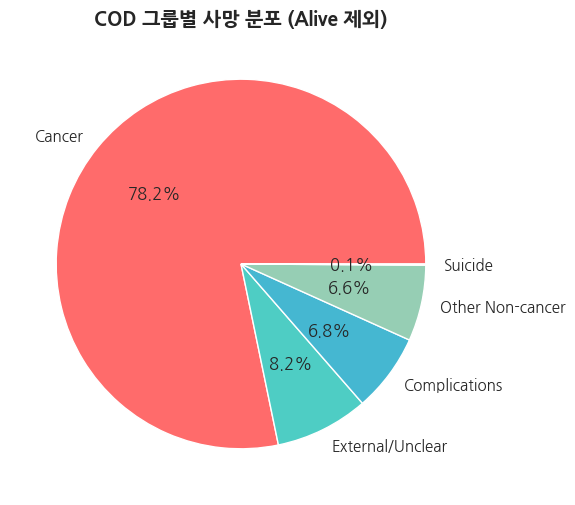

In [51]:
# 1. COD 그룹별 사망 분포 (파이차트)
plt.figure(figsize=(8, 6))
plt.pie(death_data.values, labels=death_data.index, autopct='%1.1f%%', colors=colors[:len(death_data)])
plt.title('COD 그룹별 사망 분포 (Alive 제외)', fontsize=14, fontweight='bold')
plt.show()

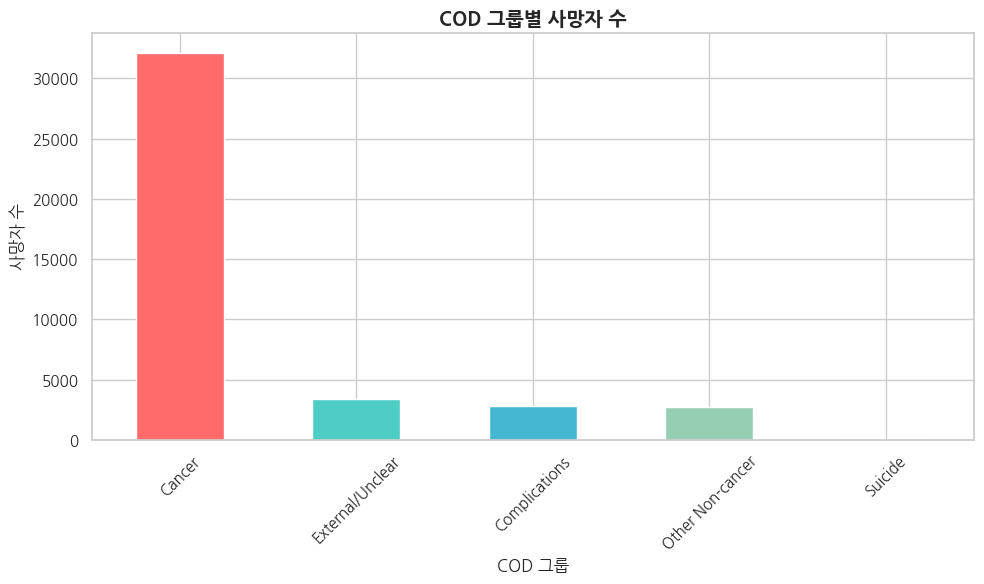

In [52]:
# 2. COD 그룹별 사망자 수 (막대차트)
plt.figure(figsize=(10, 6))
death_data.plot(kind='bar', color=colors[:len(death_data)])
plt.title('COD 그룹별 사망자 수', fontsize=14, fontweight='bold')
plt.xlabel('COD 그룹')
plt.ylabel('사망자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

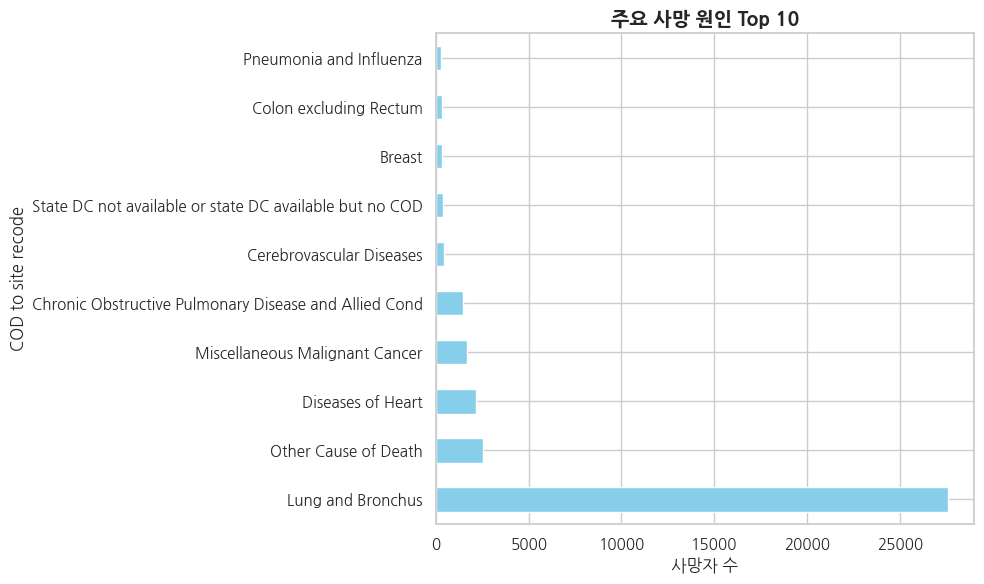

In [53]:
# 3. 주요 COD 원인 Top 10 (수평 막대차트)
plt.figure(figsize=(10, 6))
top_cod = encoded_df[encoded_df['COD to site recode'] != 'Alive']['COD to site recode'].value_counts().head(10)
top_cod.plot(kind='barh', color='skyblue')
plt.title('주요 사망 원인 Top 10', fontsize=14, fontweight='bold')
plt.xlabel('사망자 수')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

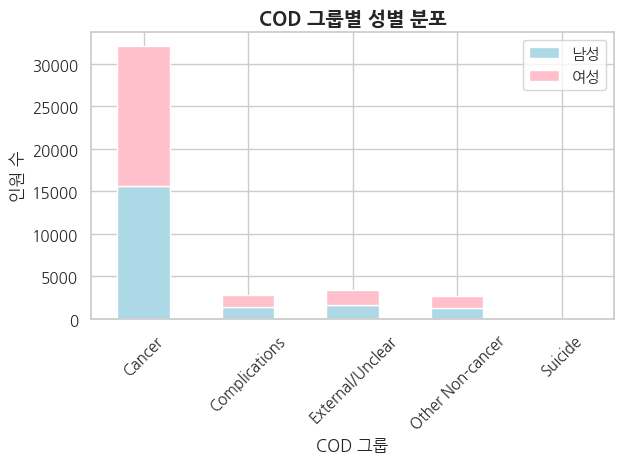

In [54]:
# 4. COD 그룹별 성별 분포
if 'Sex' in encoded_df.columns:
    plt.figure(figsize=(10, 6))
    cod_sex = pd.crosstab(encoded_df['COD_Group'], encoded_df['Sex'])
    cod_sex = cod_sex.drop('Unknown', errors='ignore')  # Unknown 제거
    cod_sex.plot(kind='bar', stacked=True, color=['lightblue', 'pink'])
    plt.title('COD 그룹별 성별 분포', fontsize=14, fontweight='bold')
    plt.xlabel('COD 그룹')
    plt.ylabel('인원 수')
    plt.xticks(rotation=45)
    plt.legend(['남성', '여성'])
    plt.tight_layout()
    plt.show()
else:
    print("성별 정보를 찾을 수 없습니다.")

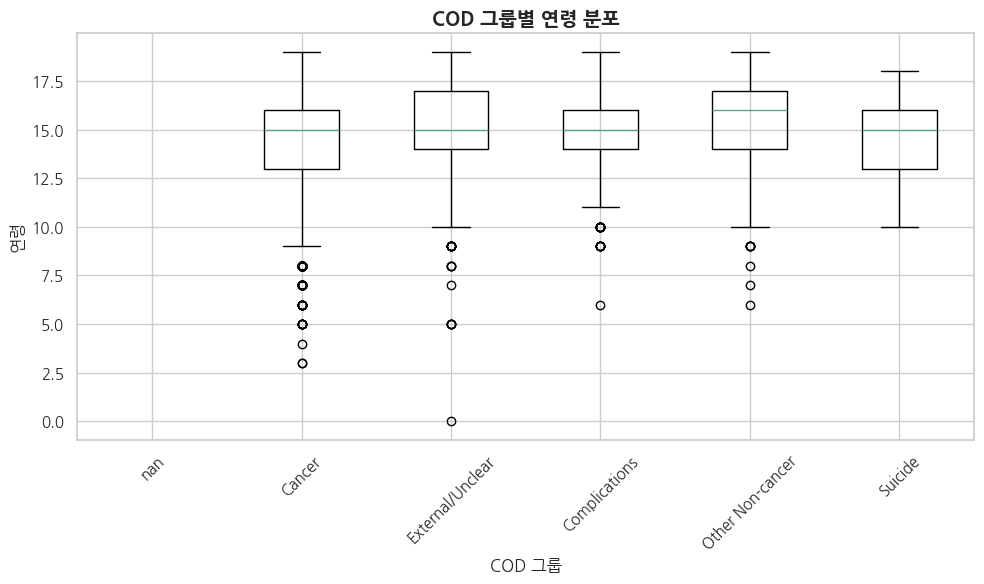

In [55]:
# 5. COD 그룹별 연령 분포 (박스플롯)
age_cols = [col for col in encoded_df.columns if 'Age' in col or 'age' in col]
if age_cols:
    plt.figure(figsize=(10, 6))
    age_col = age_cols[0]  # 첫 번째 연령 컬럼 사용
    
    # 사망한 경우만 (Unknown 제외)
    death_df_age = encoded_df[encoded_df['COD_Group'] != 'Unknown']
    
    # 각 COD 그룹별로 상자그림 그리기
    groups = death_df_age['COD_Group'].unique()
    age_by_group = [death_df_age[death_df_age['COD_Group'] == group][age_col].dropna() for group in groups]
    
    plt.boxplot(age_by_group, tick_labels=groups)
    plt.title('COD 그룹별 연령 분포', fontsize=14, fontweight='bold')
    plt.xlabel('COD 그룹')
    plt.ylabel('연령')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("연령 정보를 찾을 수 없습니다.")

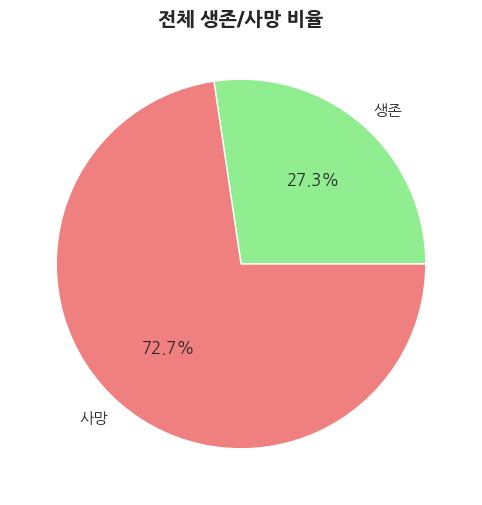

In [56]:
# 6. 전체 생존 vs 사망 비율 (파이차트)
plt.figure(figsize=(8, 6))
plt.pie([total_alive, total_death], labels=['생존', '사망'], autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'])
plt.title('전체 생존/사망 비율', fontsize=14, fontweight='bold')
plt.show()

=== COD 그룹별 생존 분석 ===
생존 관련 컬럼: ['Year of follow-up recode', 'Survival months', 'Survival months_bin_3m']


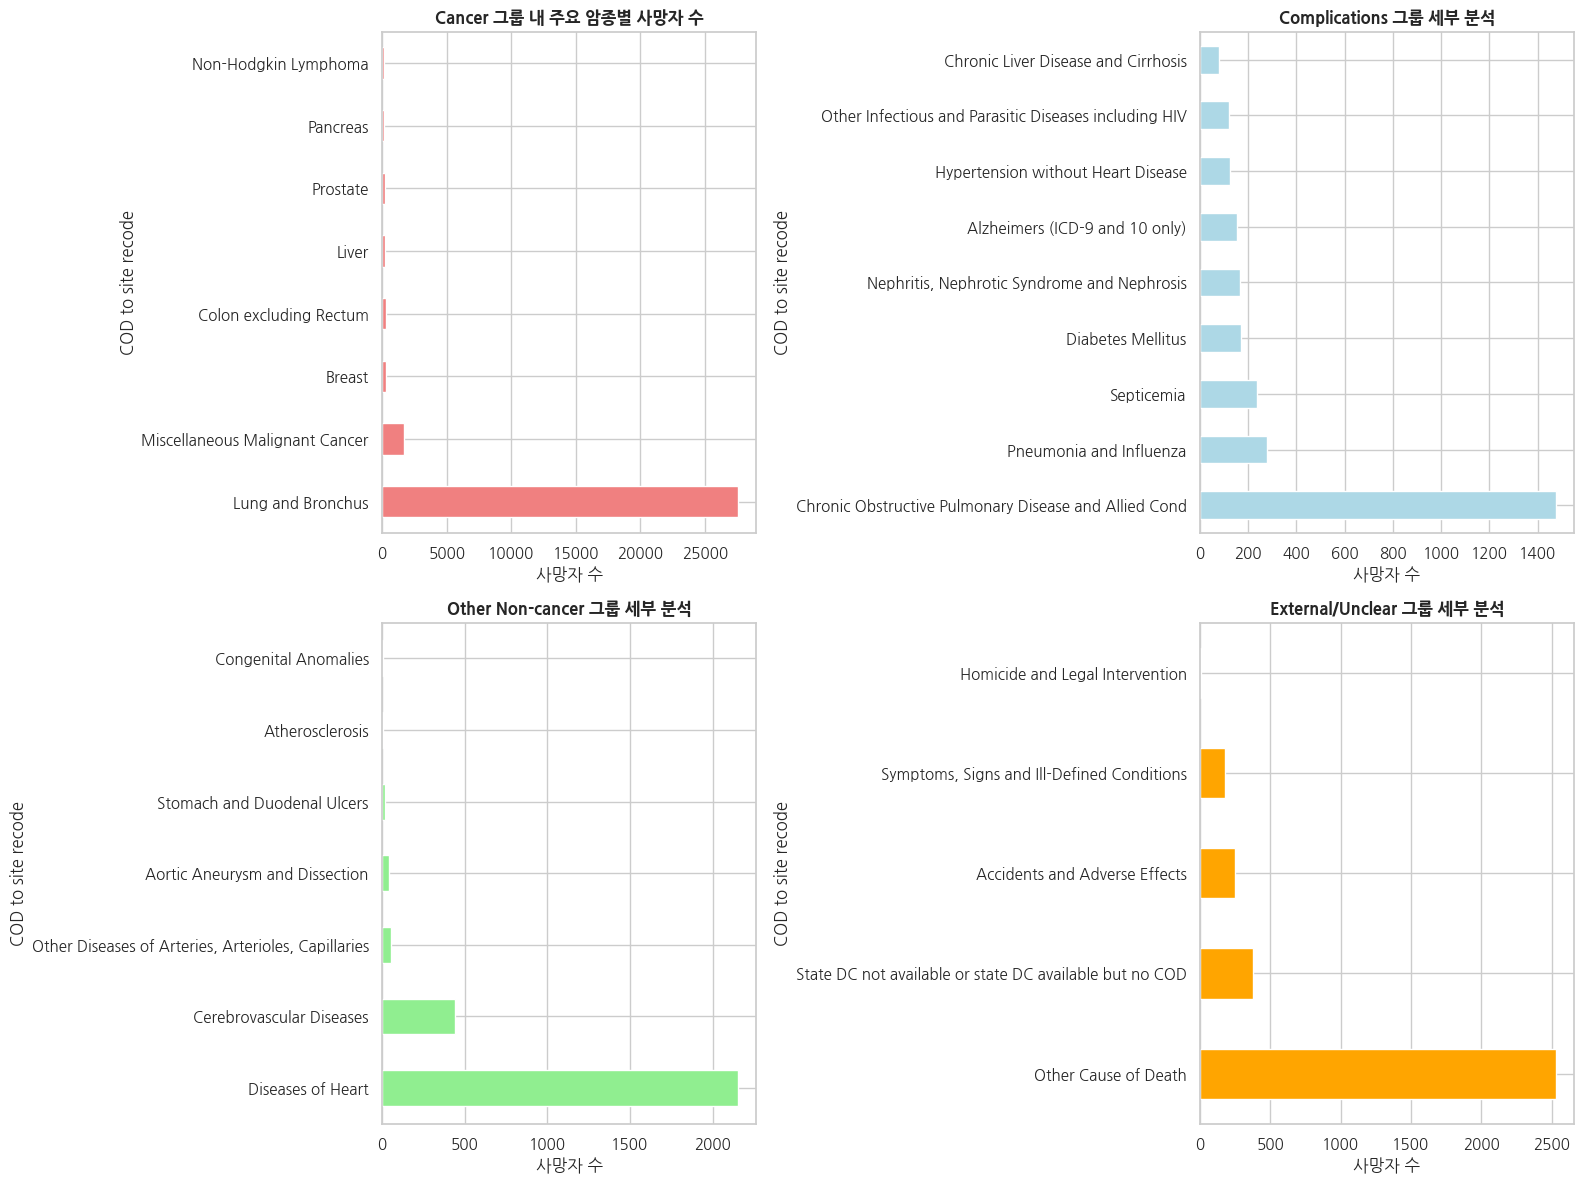


=== COD 그룹별 주요 특징 ===
🔴 Cancer (암 직접 사망): 30,689명
   - 주요 원인: Lung and Bronchus (27,600명)

🔵 Complications (합병증): 2,808명
   - 주요 원인: Chronic Obstructive Pulmonary Disease and Allied Cond (1,477명)

🟢 Other Non-cancer (기타 질병): 2,729명
   - 주요 원인: Diseases of Heart (2,156명)

🟠 External/Unclear (외인사·불명): 3,353명
   - 주요 원인: Other Cause of Death (2,533명)

🟣 Suicide (자살): 41명


In [57]:
# COD 그룹별 생존 분석
print("=== COD 그룹별 생존 분석 ===")

# 생존 기간 관련 컬럼 찾기
survival_cols = [col for col in encoded_df.columns if any(keyword in col.lower() 
                for keyword in ['survival', 'follow', 'month', 'time'])]
print(f"생존 관련 컬럼: {survival_cols}")

# 첫 번째 그래프: COD 그룹별 상세 분석
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cancer 그룹 내 세부 암종별 분포
ax1 = axes[0, 0]
cancer_data = encoded_df[encoded_df['COD_Group'] == 'Cancer']['COD to site recode'].value_counts().head(8)
cancer_data.plot(kind='barh', ax=ax1, color='lightcoral')
ax1.set_title('Cancer 그룹 내 주요 암종별 사망자 수', fontsize=12, fontweight='bold')
ax1.set_xlabel('사망자 수')

# 2. Complications 그룹 세부 분석
ax2 = axes[0, 1]
comp_data = encoded_df[encoded_df['COD_Group'] == 'Complications']['COD to site recode'].value_counts()
comp_data.plot(kind='barh', ax=ax2, color='lightblue')
ax2.set_title('Complications 그룹 세부 분석', fontsize=12, fontweight='bold')
ax2.set_xlabel('사망자 수')

# 3. Other Non-cancer 그룹 세부 분석
ax3 = axes[1, 0]
other_data = encoded_df[encoded_df['COD_Group'] == 'Other Non-cancer']['COD to site recode'].value_counts()
other_data.plot(kind='barh', ax=ax3, color='lightgreen')
ax3.set_title('Other Non-cancer 그룹 세부 분석', fontsize=12, fontweight='bold')
ax3.set_xlabel('사망자 수')

# 4. External/Unclear 그룹 세부 분석
ax4 = axes[1, 1]
ext_data = encoded_df[encoded_df['COD_Group'] == 'External/Unclear']['COD to site recode'].value_counts()
ext_data.plot(kind='barh', ax=ax4, color='orange')
ax4.set_title('External/Unclear 그룹 세부 분석', fontsize=12, fontweight='bold')
ax4.set_xlabel('사망자 수')

plt.tight_layout()
plt.show()

# COD 그룹별 주요 특징 요약
print("\n=== COD 그룹별 주요 특징 ===")
print(f"🔴 Cancer (암 직접 사망): {cancer_data.sum():,}명")
print(f"   - 주요 원인: {cancer_data.index[0]} ({cancer_data.iloc[0]:,}명)")

print(f"\n🔵 Complications (합병증): {comp_data.sum():,}명") 
print(f"   - 주요 원인: {comp_data.index[0]} ({comp_data.iloc[0]:,}명)")

print(f"\n🟢 Other Non-cancer (기타 질병): {other_data.sum():,}명")
print(f"   - 주요 원인: {other_data.index[0]} ({other_data.iloc[0]:,}명)")

print(f"\n🟠 External/Unclear (외인사·불명): {ext_data.sum():,}명")
print(f"   - 주요 원인: {ext_data.index[0]} ({ext_data.iloc[0]:,}명)")

suicide_count = encoded_df[encoded_df['COD_Group'] == 'Suicide'].shape[0]
print(f"\n🟣 Suicide (자살): {suicide_count:,}명")

=== COD 그룹별 생존 기간 분석 ===


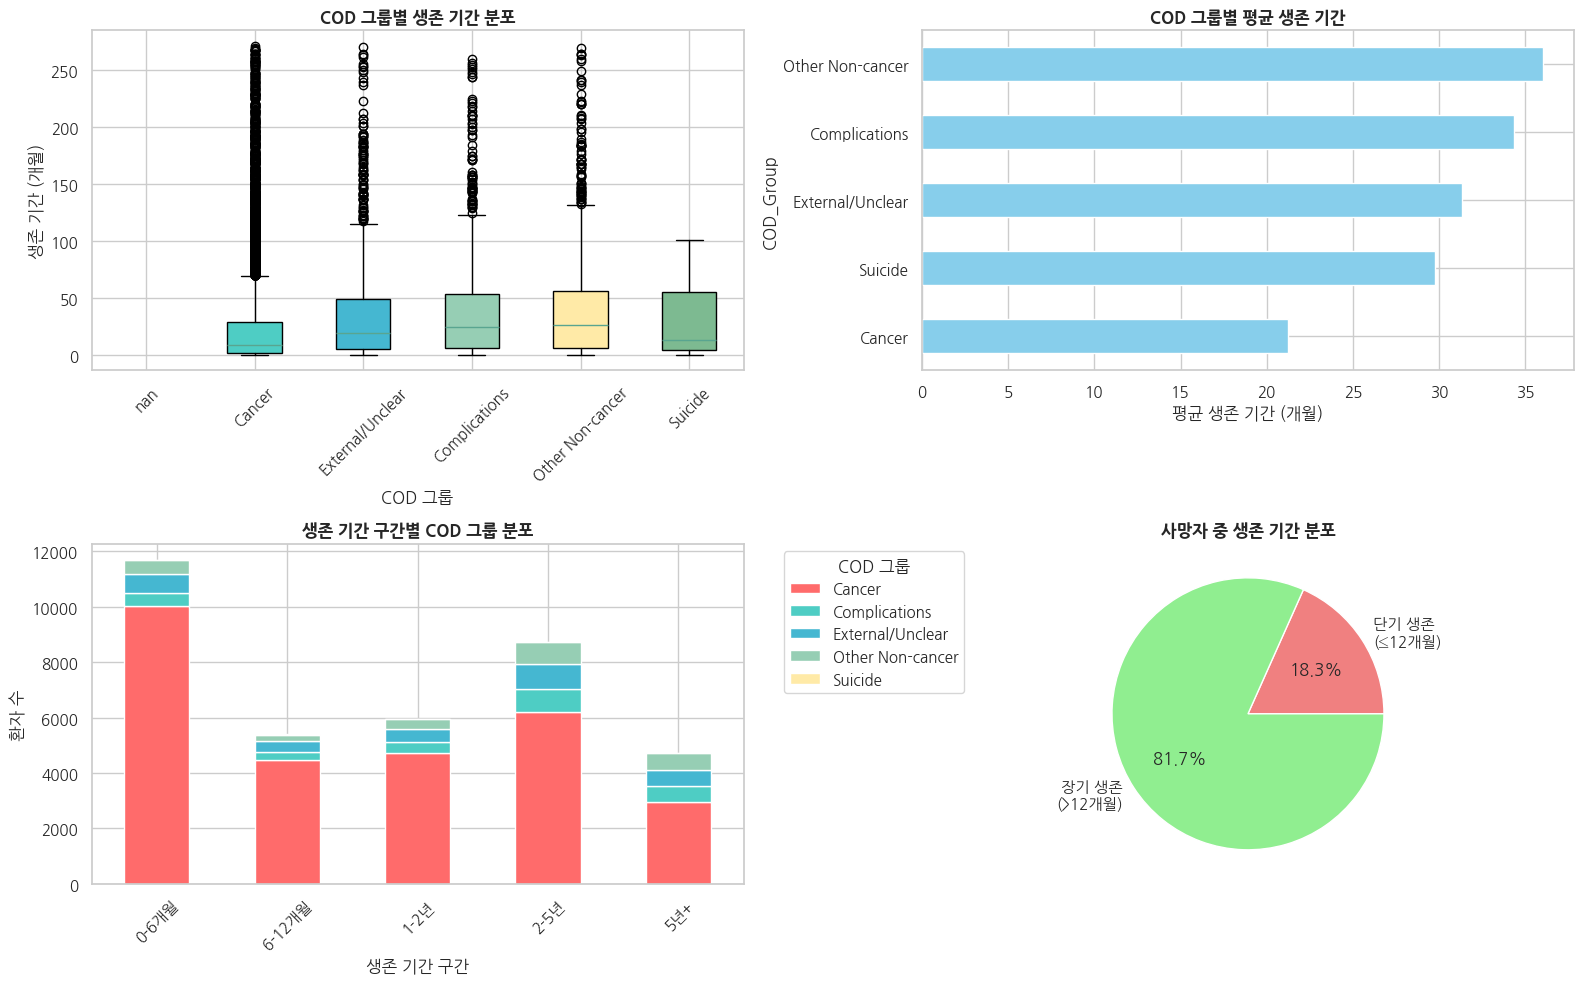


=== 생존 기간 통계 요약 ===
                    환자수  평균(개월)  중앙값(개월)  표준편차
COD_Group                                     
Cancer            32123    21.3      9.0  31.0
Complications      2808    34.3     24.0  36.5
External/Unclear   3353    31.3     19.0  36.3
Other Non-cancer   2729    36.0     26.0  38.4
Suicide              41    29.8     13.0  31.3

전체 사망자 중:
- 단기 생존자 (≤12개월): 72,039명 (18.3%)
- 장기 생존자 (>12개월): 321,279명 (81.7%)


In [58]:
# COD 그룹별 생존 기간 분석
print("=== COD 그룹별 생존 기간 분석 ===")

# 생존 기간 컬럼이 있는 경우
if 'Survival months' in encoded_df.columns:
    
    # 사망한 경우만 (Unknown 제외)
    death_df = encoded_df[encoded_df['COD_Group'] != 'Unknown'].copy()
    
    # 생존 기간이 유효한 데이터만
    death_df = death_df[death_df['Survival months'].notna()]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # 1. COD 그룹별 생존 기간 분포 (박스플롯)
    ax1 = axes[0, 0]
    groups = death_df['COD_Group'].unique()
    survival_by_group = [death_df[death_df['COD_Group'] == group]['Survival months'].dropna() 
                        for group in groups]
    
    bp = ax1.boxplot(survival_by_group, tick_labels=groups, patch_artist=True)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    for patch, color in zip(bp['boxes'], colors[:len(groups)]):
        patch.set_facecolor(color)
    
    ax1.set_title('COD 그룹별 생존 기간 분포', fontsize=12, fontweight='bold')
    ax1.set_xlabel('COD 그룹')
    ax1.set_ylabel('생존 기간 (개월)')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. COD 그룹별 평균 생존 기간
    ax2 = axes[0, 1]
    mean_survival = death_df.groupby('COD_Group')['Survival months'].mean().sort_values(ascending=True)
    mean_survival.plot(kind='barh', ax=ax2, color='skyblue')
    ax2.set_title('COD 그룹별 평균 생존 기간', fontsize=12, fontweight='bold')
    ax2.set_xlabel('평균 생존 기간 (개월)')
    
    # 3. 생존 기간 구간별 COD 그룹 분포
    ax3 = axes[1, 0]
    # 생존 기간을 구간으로 나누기
    death_df['Survival_Category'] = pd.cut(death_df['Survival months'], 
                                         bins=[0, 6, 12, 24, 60, float('inf')],
                                         labels=['0-6개월', '6-12개월', '1-2년', '2-5년', '5년+'])
    
    survival_cod_crosstab = pd.crosstab(death_df['Survival_Category'], death_df['COD_Group'])
    survival_cod_crosstab.plot(kind='bar', stacked=True, ax=ax3, 
                              color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
    ax3.set_title('생존 기간 구간별 COD 그룹 분포', fontsize=12, fontweight='bold')
    ax3.set_xlabel('생존 기간 구간')
    ax3.set_ylabel('환자 수')
    ax3.tick_params(axis='x', rotation=45)
    ax3.legend(title='COD 그룹', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 4. 단기 vs 장기 생존자 비율
    ax4 = axes[1, 1]
    short_term = (death_df['Survival months'] <= 12).sum()
    long_term = (death_df['Survival months'] > 12).sum()
    
    ax4.pie([short_term, long_term], labels=['단기 생존\n(≤12개월)', '장기 생존\n(>12개월)'], 
           autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
    ax4.set_title('사망자 중 생존 기간 분포', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 통계 요약
    print(f"\n=== 생존 기간 통계 요약 ===")
    survival_stats = death_df.groupby('COD_Group')['Survival months'].agg(['count', 'mean', 'median', 'std'])
    survival_stats.columns = ['환자수', '평균(개월)', '중앙값(개월)', '표준편차']
    survival_stats = survival_stats.round(1)
    print(survival_stats)
    
    print(f"\n전체 사망자 중:")
    print(f"- 단기 생존자 (≤12개월): {short_term:,}명 ({short_term/(short_term+long_term)*100:.1f}%)")
    print(f"- 장기 생존자 (>12개월): {long_term:,}명 ({long_term/(short_term+long_term)*100:.1f}%)")

else:
    print("생존 기간 데이터를 찾을 수 없습니다.")

---
## 🎯 COD 기준 EDA 결과 요약 및 인사이트

### 📊 주요 발견 사항

#### 1. **사망 원인 분포**
- **Cancer (78.2%)**: 암 직접 사망이 압도적으로 높음
  - 폐암(Lung and Bronchus)이 27,600명으로 가장 많음
- **External/Unclear (8.2%)**: 외인사 및 불명 사망
- **Complications (6.8%)**: 합병증 관련 사망
- **Other Non-cancer (6.6%)**: 기타 질병
- **Suicide (0.1%)**: 자살 사망

#### 2. **생존 기간 분석**
- **Cancer 그룹**: 평균 21.3개월, 중앙값 9.0개월 (가장 짧음)
- **Other Non-cancer 그룹**: 평균 36.0개월, 중앙값 26.0개월 (가장 김)
- **Complications 그룹**: 평균 34.3개월, 중앙값 24.0개월
- **External/Unclear 그룹**: 평균 31.3개월, 중앙값 19.0개월

#### 3. **의료진/병원 관점 인사이트**
- **즉시 개입 필요**: Cancer 그룹 (생존 기간이 가장 짧음)
- **관리 개선 여지**: Complications 그룹 (병원 케어로 예방 가능)
- **장기 관리 대상**: Other Non-cancer 그룹 (상대적으로 생존 기간 길음)

### 💡 활용 방안
1. **예후 예측 모델링**: COD 그룹별 생존 기간 차이를 활용한 위험도 층화
2. **치료 전략 수립**: 그룹별 특성에 맞는 맞춤형 치료 계획
3. **자원 배치 최적화**: 높은 위험군(Cancer)에 집중적 자원 투입
4. **품질 관리 지표**: Complications 그룹 사망률을 병원 품질 지표로 활용